#### Price to weight dataset sheet metal segment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_theme(context='notebook',
    style='whitegrid',
    palette='hls')

In [3]:
data = pd.read_csv(r"D:\Dataset\ML\RPROJ001\Data01.csv",encoding="ISO-8859-1")
data.head()

,Plant_code,Supplier,Material_user_country,Item_weight_kg,One_Year_forecast_qty,12_month_forecast_spend,Price_per_unit_in_JPY
0,7876 - TSA,AB Linde Maskiner,7876 - TSA,0.357,485,160579.09160,315.624877
1,7876 - TSA,Gnotec AB,7876 - TSA,0.013,1539,12879.92714,8.015453
2,7876 - TSA,Gnotec AB,7876 - TSA,0.052,0,0.00000,27.068578
3,7876 - TSA,Gnotec AB,7876 - TSA,0.190,9859,767615.65750,73.978687
4,7876 - TSA,Gnotec AB,7876 - TSA,0.034,0,0.00000,14.848298


In [4]:
data.shape

(1813, 7)

In [5]:
data.isnull().sum()

Plant_code                 0
Supplier                   0
Material_user_country      0
Item_weight_kg             0
One_Year_forecast_qty      0
12_month_forecast_spend    0
Price_per_unit_in_JPY      0
dtype: int64

In [6]:
data.describe()

,Item_weight_kg,One_Year_forecast_qty,12_month_forecast_spend,Price_per_unit_in_JPY
count,1813.000000,1813.000000,1.813000e+03,1813.000000
mean,1.052426,886.085494,2.015245e+05,776.977026
std,4.576174,3577.411192,8.050493e+05,3984.781463
min,0.000000,0.000000,0.000000e+00,0.109791
25%,0.115000,0.000000,0.000000e+00,92.242272
50%,0.306000,0.000000,0.000000e+00,234.339408
75%,0.732000,205.000000,3.681979e+04,548.953392
max,93.420000,74528.000000,1.233421e+07,74972.165830


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant_code               1813 non-null   object 
 1   Supplier                 1813 non-null   object 
 2   Material_user_country    1813 non-null   object 
 3   Item_weight_kg           1813 non-null   float64
 4   One_Year_forecast_qty    1813 non-null   int64  
 5   12_month_forecast_spend  1813 non-null   float64
 6   Price_per_unit_in_JPY    1813 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 99.3+ KB


In [8]:
data.nunique()

Plant_code                    3
Supplier                     90
Material_user_country         3
Item_weight_kg              531
One_Year_forecast_qty       505
12_month_forecast_spend     516
Price_per_unit_in_JPY      1153
dtype: int64

In [9]:
data.columns

Index(['Plant_code', 'Supplier', 'Material_user_country', 'Item_weight_kg',
       'One_Year_forecast_qty', '12_month_forecast_spend',
       'Price_per_unit_in_JPY'],
      dtype='object')

In [10]:
continuous = ['12_month_forecast_spend','Item_weight_kg','One_Year_forecast_qty']
categorical = ['Plant_code','Material_user_country']
non_categorical = ['Supplier']

#### Univariant Analysis

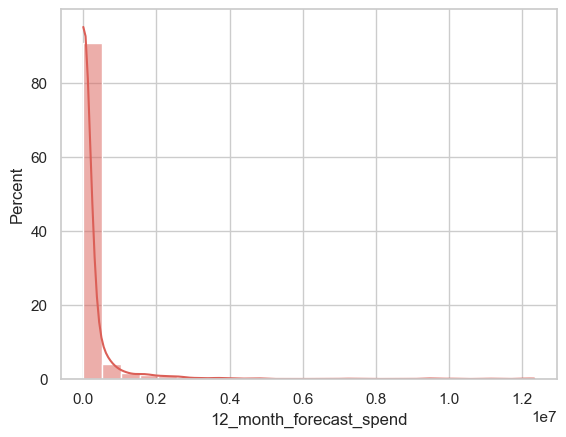

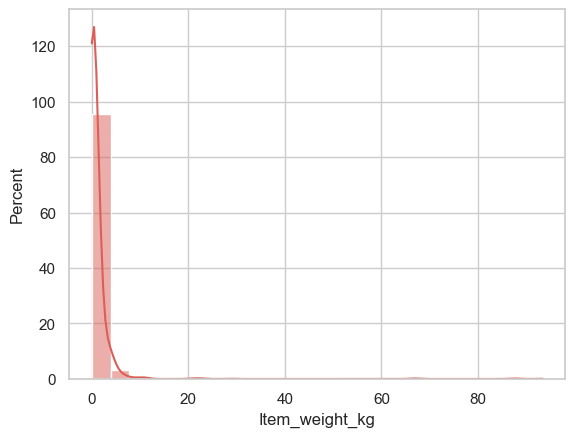

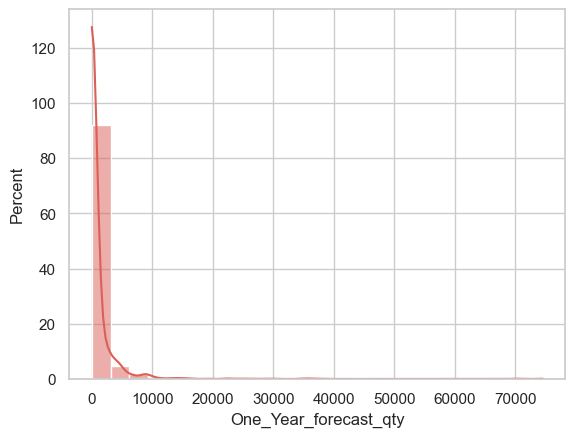

In [11]:
#Continuous
for i in continuous:
    bins = int(2 * (data.shape[0] ** (1/3)))
    sns.histplot(x = i, data = data,bins = bins,kde = True,stat = 'percent')
    plt.show()


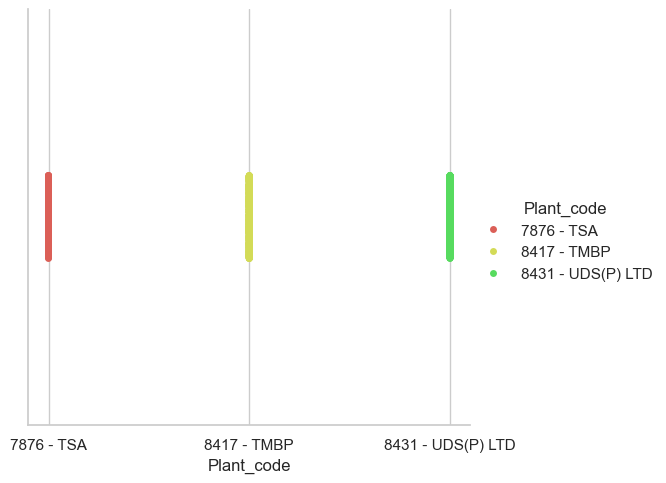

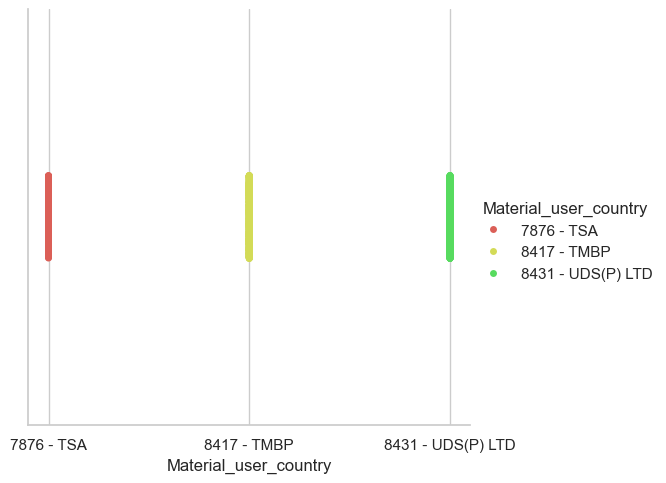

In [12]:
#categorical)
for i in categorical:
    sns.catplot(x = i,data = data,hue = i)

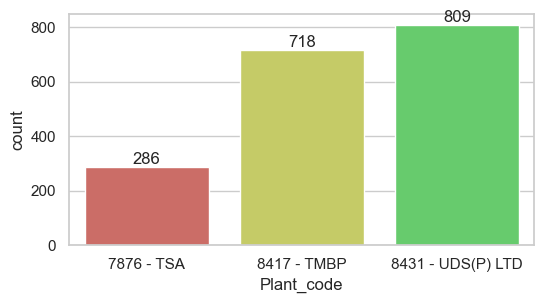

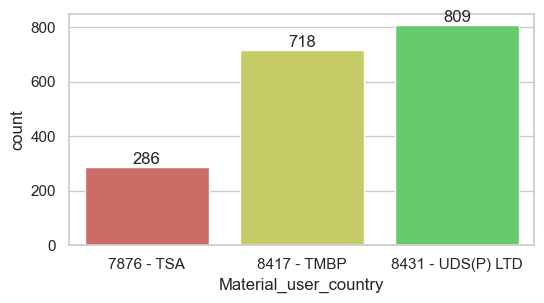

In [13]:
for i in categorical:
    plt.figure(figsize = (6,3))
    ax = sns.countplot(x = i , data = data,hue = i)
    for i in ax.containers:
        ax.bar_label(i,fmt = '%d')
    plt.show()

#### Bivariant Analysis

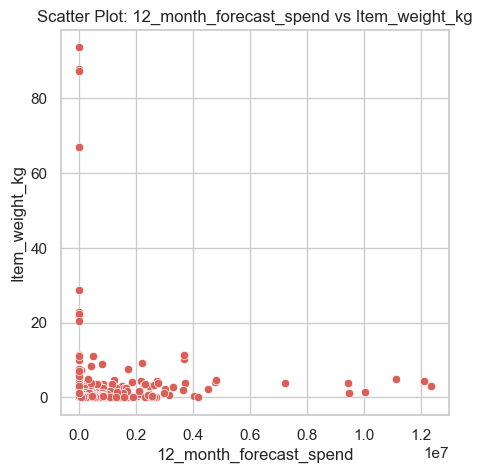

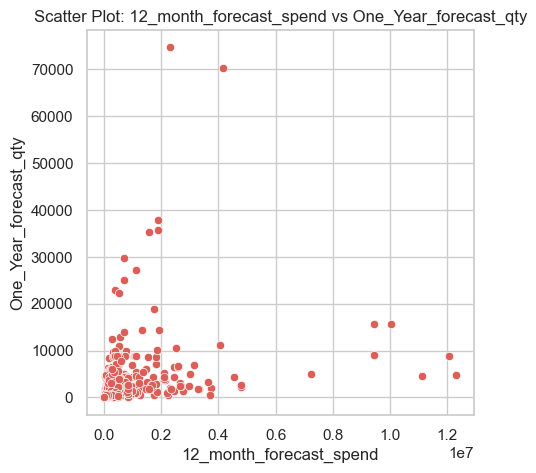

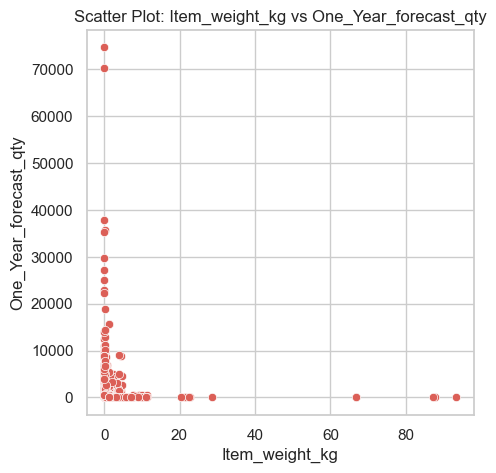

In [14]:
#Continuous and Continuous
for i in range(len(continuous)):
    for j in range(i+1, len(continuous)):  # Avoid duplicate and self-comparison
        plt.figure(figsize=(5, 5))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=data)
        plt.xlabel(continuous[i])
        plt.ylabel(continuous[j])
        plt.title(f"Scatter Plot: {continuous[i]} vs {continuous[j]}")
        plt.show()

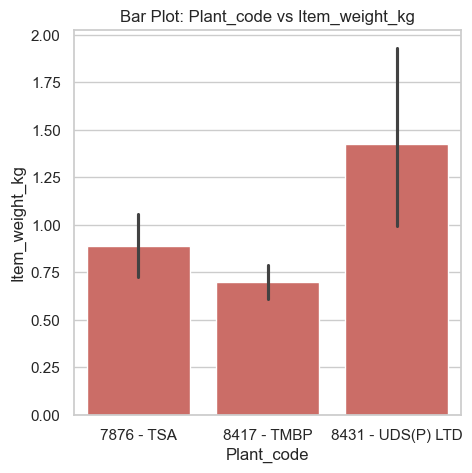

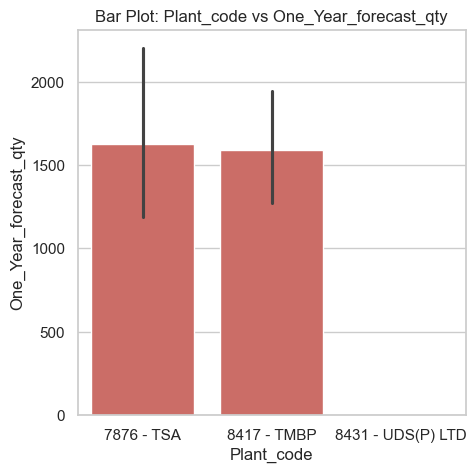

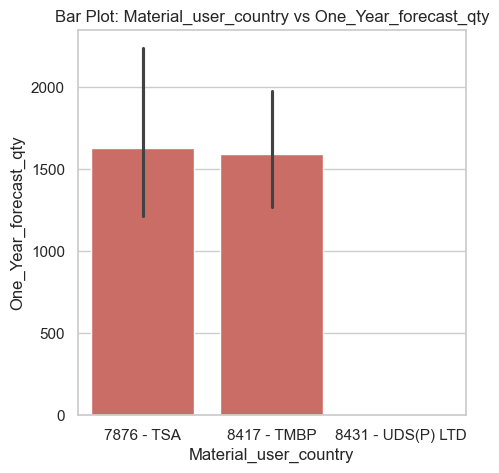

In [15]:
#categorical and continuous
for i in range(len(categorical)):
    for j in range(i+1, len(continuous)):  # Avoid duplicate and self-comparison
        plt.figure(figsize=(5, 5))
        sns.barplot(x=categorical[i], y=continuous[j], data=data)
        plt.xlabel(categorical[i])
        plt.ylabel(continuous[j])
        plt.title(f"Bar Plot: {categorical[i]} vs {continuous[j]}")
        plt.show()

Cross-tabulation of Plant_code vs Material_user_country:
Material_user_country  7876 - TSA  8417 - TMBP  8431 - UDS(P) LTD
Plant_code                                                       
7876 - TSA                    286            0                  0
8417 - TMBP                     0          718                  0
8431 - UDS(P) LTD               0            0                809 



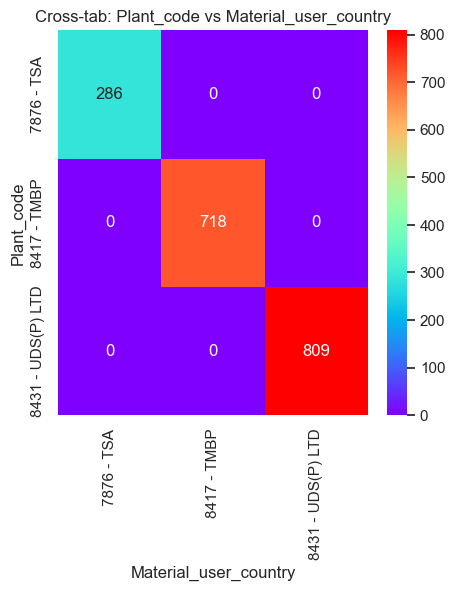

In [16]:
#categorical and categorical
for i in range(len(categorical)):
    for j in range(i + 1, len(categorical)): 
        cross_tab = pd.crosstab(data[categorical[i]], data[categorical[j]])
        print(f"Cross-tabulation of {categorical[i]} vs {categorical[j]}:")
        print(cross_tab, "\n")

        # Plot as a heatmap
        plt.figure(figsize=(5, 5))
        sns.heatmap(cross_tab, annot=True, cmap="rainbow", fmt="d")
        plt.xlabel(categorical[j])
        plt.ylabel(categorical[i])
        plt.title(f"Cross-tab: {categorical[i]} vs {categorical[j]}")
        plt.show()

#### Multivariant analysis

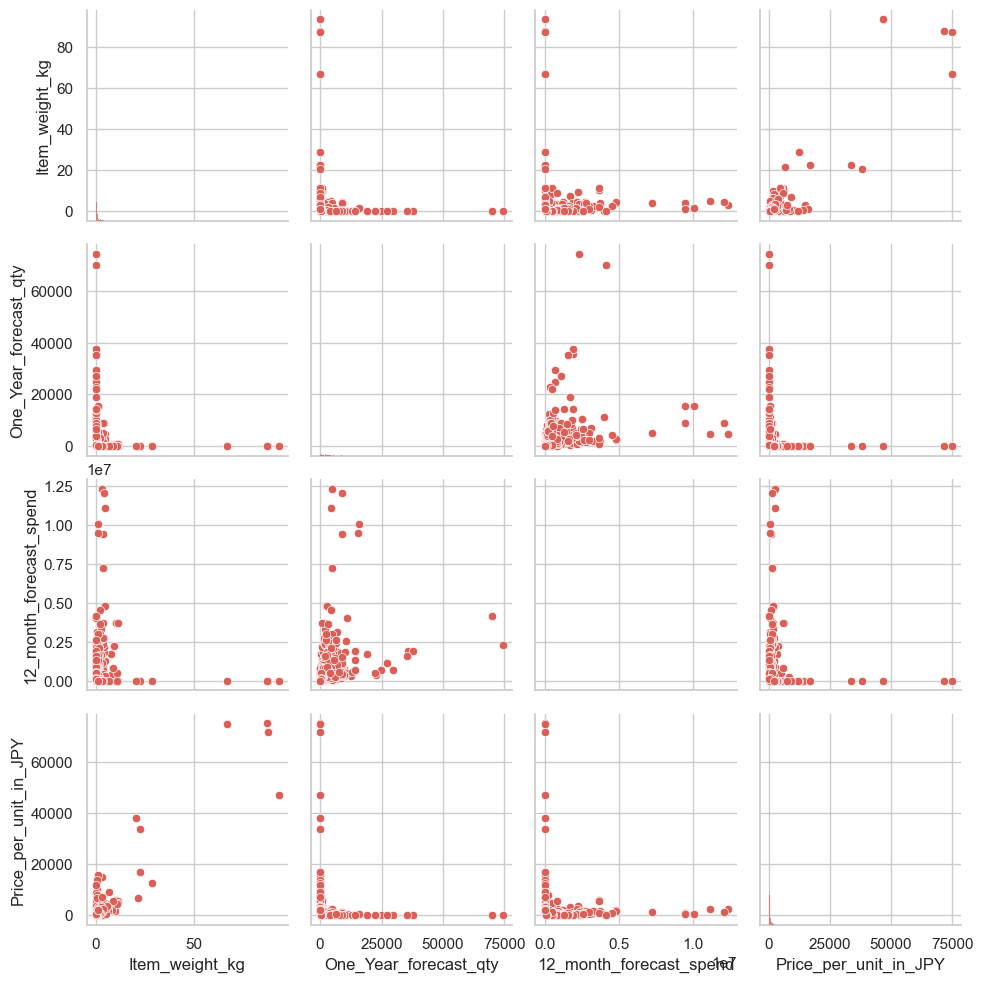

In [17]:
sns.pairplot(data = data)
plt.show()

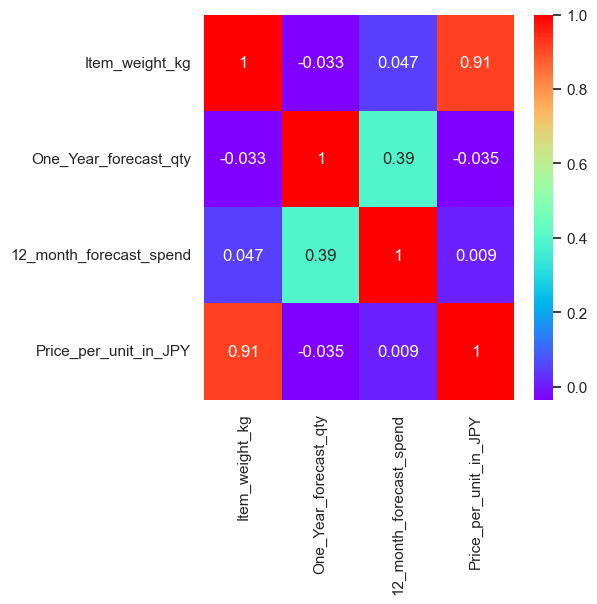

In [18]:
#Correlation
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(numeric_only = True),cmap = 'rainbow',annot = True)
plt.show()

In [19]:
continuous

['12_month_forecast_spend', 'Item_weight_kg', 'One_Year_forecast_qty']

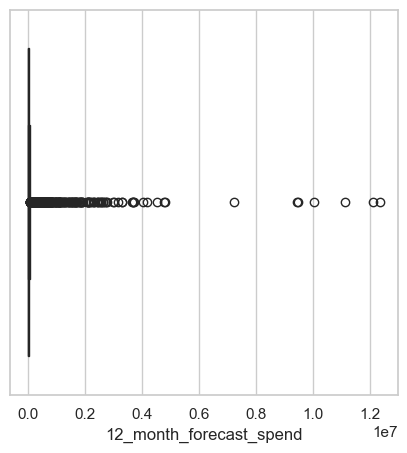

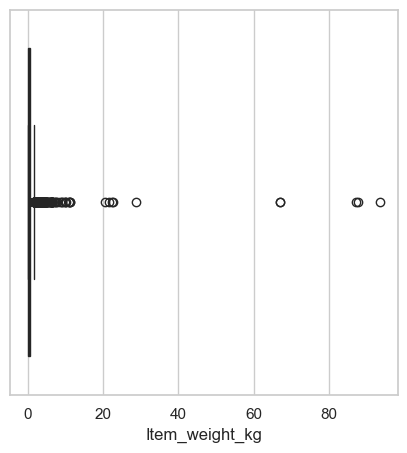

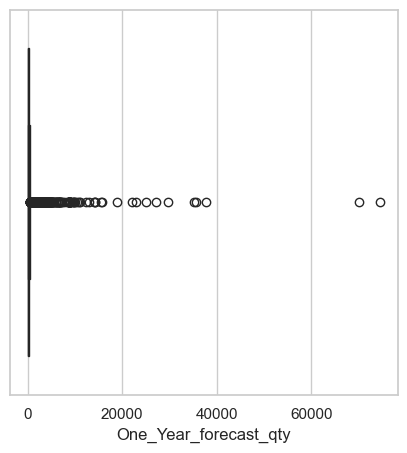

In [20]:
for i in continuous:
    plt.figure(figsize = (5,5))
    sns.boxplot(x = i ,data = data,color = 'green')
    plt.show()

In [21]:
def outlier(data,f):
    q1 = data[f].quantile(0.25)
    q3 = data[f].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr
    data[f] = data[f].clip(lower = ll,upper = ul)
    return data

In [22]:
for i in continuous:
    outlier(data,i)

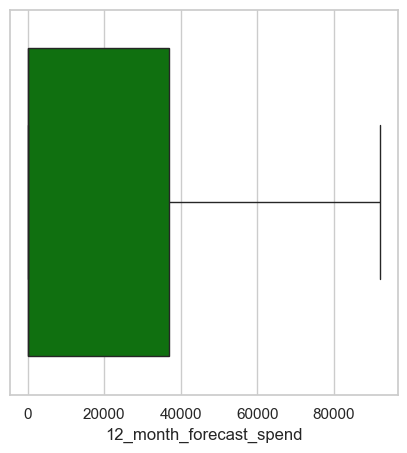

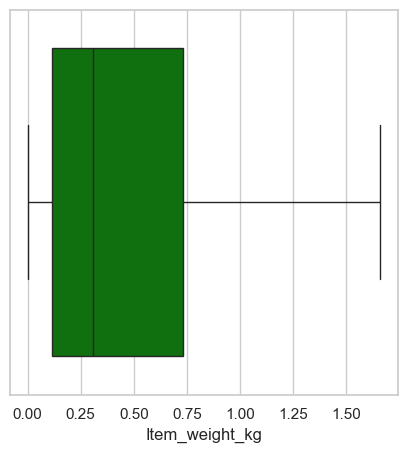

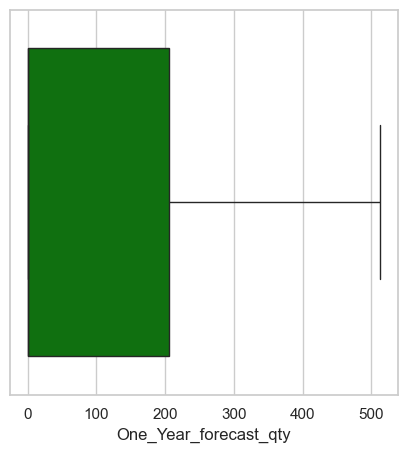

In [23]:
for i in continuous:
    plt.figure(figsize = (5,5))
    sns.boxplot(x = i ,data = data,color = 'green')
    plt.show()

In [24]:
data.columns

Index(['Plant_code', 'Supplier', 'Material_user_country', 'Item_weight_kg',
       'One_Year_forecast_qty', '12_month_forecast_spend',
       'Price_per_unit_in_JPY'],
      dtype='object')

In [25]:
x = data.iloc[:,data.columns != 'Price_per_unit_in_JPY']
y = data[['Price_per_unit_in_JPY']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
categorical_features = ['Plant_code', 'Supplier', 'Material_user_country']
numerical_features = ['Item_weight_kg','One_Year_forecast_qty', '12_month_forecast_spend']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [29]:
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), numerical_features),
                                                 ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [30]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Item_weight_kg', 'One_Year_forecast_qty',
                                  '12_month_forecast_spend']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Plant_code', 'Supplier',
                                  'Material_user_country'])])

In [31]:
pipeline = Pipeline(steps = [('preprocessor',preprocessor), ('regressor', LinearRegression())])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [33]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Item_weight_kg',
                                                   'One_Year_forecast_qty',
                                                   '12_month_forecast_spend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Plant_code', 'Supplier',
                                                   'Material_user_country'])])),
                ('regressor', LinearRegression())])

In [34]:
y_pred = pipeline.predict(x_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error : {mse}')
print(f'R^2 Score : {r2}')

Mean Squared Error : 17959164.658449426
R^2 Score : 0.17504385528096045


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [37]:
models = {'LinearRegression':LinearRegression(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'XGBRegressor':XGBRegressor(eval_metric='mae'),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'KNeighborsRegressor':KNeighborsRegressor(),
         'SVR':SVR()}

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
np.random.seed(40)
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps = [('preprocessor',preprocessor), ('model', model)])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R2': r2}

In [40]:
results_df = pd.DataFrame(results).T
print(results_df)

                              MAE        R2
LinearRegression       963.562501  0.175044
DecisionTreeRegressor  610.079207  0.494669
RandomForestRegressor  568.029304  0.518843
XGBRegressor           625.644876  0.492476
AdaBoostRegressor      648.687549  0.585215
KNeighborsRegressor    622.891372  0.479191
SVR                    668.287957 -0.008403


In [41]:
pipeline1 = Pipeline(steps = [('preprocessor',preprocessor), ('model', RandomForestRegressor())])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
pipeline1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Item_weight_kg',
                                                   'One_Year_forecast_qty',
                                                   '12_month_forecast_spend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Plant_code', 'Supplier',
                                                   'Material_user_country'])])),
                ('model', RandomForestRegressor())])

In [42]:
pipeline1.score(x_train,y_train)

0.5198242317589391

In [43]:
pipeline1.score(x_test,y_test)

0.5393397981410203

In [44]:
import pickle

In [45]:
with open('model.pkl','wb') as f:
    pickle.dump(pipeline1,f)

In [2]:
pwd

'C:\\Users\\91909\\0 Real Project\\Predictive model for price of bracket in JPY'